# Problemas
Analisar sentimentos em resenhas de filmes, o destque tera 50.000 filmes para ser abalisados, O dataset possui uma coluna alvo que é o sentimetno( pos - positivo e neg - negativo).
no final, devemos treina um modelo de regressão logística, mas antes entender e tranformar o texto em uspaço vetorial(números). Para isso utilizaremos tecnicas de Bag Of Word ( sacola de palavras). Nosso objetivo é treinar um modelo que tenha pelo meos 60 % de acurácia. Devemos também relembrar o word Cçoud(nuvem de palavras) para categorizar nosso texto(corpus)

# Data Kanggle

In [12]:
! pip install pandas

In [13]:
import pandas as pd

In [14]:
df_resenhas = pd.read_csv('/content/datasets/imdb-reviews-pt-br.csv', encoding='utf-8')
df_resenhas.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg



| **Método**                   | **Descrição**                                                                 | **Quando Usar**                                                | **Exemplo**                                                        |
|------------------------------|-------------------------------------------------------------------------------|--------------------------------------------------------------|--------------------------------------------------------------------|
| **Regressão Linear Simples** | Modela a relação entre uma variável dependente e uma independente usando uma linha reta. | Quando há uma relação linear clara entre duas variáveis.    | Prever o preço de uma casa com base em sua área.                  |
| **Regressão Linear Múltipla** | Extensão da regressão linear simples que usa várias variáveis independentes. | Quando várias variáveis influenciam a variável dependente.  | Prever o preço de uma casa com área, localização e número de quartos. |
| **Regressão Polinomial**     | Modela a relação usando um polinômio de grau n.                             | Quando a relação entre as variáveis é não linear.           | Prever vendas com base no tempo, onde a relação é curva.          |
| **Árvore de Decisão**        | Estrutura hierárquica que faz decisões baseadas em perguntas sobre os dados. | Para classificação e regressão, especialmente com dados categóricos. | Classificar se um e-mail é spam ou não baseado em palavras-chave.  |
| **Regressão Logística**      | Modela a probabilidade de um evento binário.                                | Quando a variável dependente é categórica (sim/não).        | Prever se um cliente comprará ou não um produto.                  |
| **Naive Bayes**              | Classificação baseada no teorema de Bayes, assumindo independência entre variáveis. | Para tarefas de classificação, especialmente com texto.     | Classificar sentimentos em análises de produtos.                   |

# Analise do Dataset:

- Os indices do Dataframe antecede a coluna id.
- text_en: é uma colina que contém um texto em inglês.
- text_pt: é a mesma coluna em inglÊs rtaduzida oaar portugues
- sentiment: mostra o sentimento do texto sendo neg (negativos) e pos(positivos)

# Analise de variaveis:

- **text_en**: qualitativa nominal
- **text_pt**: qualitativa nominal
- **sentiment**: qualitativa nominal

In [15]:
df_resenhas.tail()

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


# Machine Learning
- scikit-learn
- machine learning in Python
- documentação: https://scikit-learn.org/stable/

  - Ferramentas simples e eficientes para análise preditiva de dados
  - Acessível a todos e reutilizável em vários contextos
  - Construído em NumPy, SciPy e matplotlib
  - Código aberto, comercialmente utilizável - licença BSD

# Machine Learning

Inteligencia artificial é um conceito geral, são maquiinas que imitam os seres vivos.
A inteligencia artifiical é dividida em duas grandes categorais
- machine Learning: modelos preditivo
- deep learning: modelo de redes neurais, visão computacional (CNN)

# Qual o tipo de machine Learning

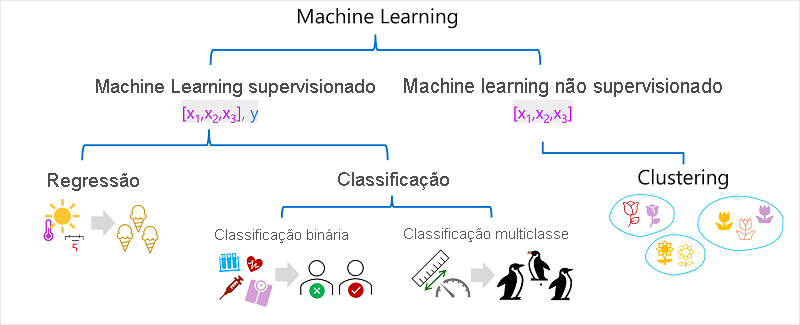

# Treino e Teste

Separar ou segregar.
70 - treinar
30 - avaliar(esconde)

- Overfitting ou Underfitting

In [16]:
# importação
from sklearn.model_selection import train_test_split

# definir variáveis de teino e de teste
# random_state: passe um int para embaralhamento
treino,teste,classe_treino,classe_teste = train_test_split(df_resenhas.text_pt,df_resenhas.sentiment,random_state=42)

In [17]:
# Terino: possui os dados do treino (70%)
# Teste: possui os dados de teste (30%)
# classe_treino: rotulos (labels) de treino
# Classe

In [18]:
# verificar treino
treino

,text_pt
1348,"Embora o filme tenha sido apenas assim, o clos..."
27466,Este é provavelmente um dos piores filmes que ...
29998,"De vez em quando, um filme irá varrer ao seu r..."
48186,Este é um conto completamente diabólico de quã...
26473,"Lenta, chata, extremamente repetitiva. Não adm..."
...,...
11284,Naach teria ganhado um Razzie para o Pior Film...
44732,Apenas assisti a esse filme em DVD e achei a a...
38158,Melhor show desde Seinfeld. Ela é realmente mu...
860,Eu pareço estar discordando com muitas pessoas...


In [19]:
df_resenhas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [20]:
# mostrando os rotulos (labels) de treino
classe_treino

,sentiment
1348,neg
27466,neg
29998,neg
48186,pos
26473,neg
...,...
11284,neg
44732,pos
38158,pos
860,neg


# Relembrado
- Variável Dependente: nosso alvo(observada no experimento)
- Variável independente: influenciam o resultado.

- Exemplo:
 - Estudo: Impacto da temperatura na taxa de crescimento de plantas.

- independente: Temperatura (°C)
- dependente: taxa de crescimento

# realize uma pesquisa:

* Qual a diferença entre a regressão linear e logística?

* O que são bag os Words
* O que são matriz esparsa
* principío de Pareto (teoria e gráficos)

# Qual a diferença entre a regressão linear e logística?



Resposta:

Regressão Linear:

* Prediz uma variável dependente contínua.
* A relação entre as variáveis independentes e a dependente é modelada como linear.
* O resultado é um valor numérico que representa a previsão.
* Exemplo: prever o preço de uma casa com base em sua área e localização.


Regressão Logística:

* Prediz a probabilidade de uma variável dependente categórica (geralmente binária, como sim/não, 0/1).
* Modela a probabilidade de uma observação pertencer a uma determinada classe.
* O resultado é a probabilidade de pertencer a uma classe específica.
* Exemplo: prever se um cliente irá ou não comprar um produto com base em seu histórico de compras.


Em resumo, a regressão linear é usada para prever valores contínuos, enquanto a regressão logística é usada para prever probabilidades de uma variável categórica.


# O que são bag os Words?

Bag-of-Words (BoW)

Bag-of-words é uma representação de texto que descreve a ocorrência de palavras dentro de um documento.
Ignora a gramática e a ordem das palavras, focando apenas na frequência das palavras.
É uma técnica simples e eficaz para processamento de linguagem natural (PLN).

Como funciona:

1. Cria um vocabulário de todas as palavras únicas presentes em um conjunto de documentos.
2. Para cada documento, conta quantas vezes cada palavra do vocabulário aparece.
3. Representa o documento como um vetor de frequência de palavras.

Exemplo:

Documentos:
- Documento 1: "O gato está na cadeira."
- Documento 2: "O cachorro está na cama."

Vocabulário: ["O", "gato", "está", "na", "cadeira", "cachorro", "cama"]

Representação BoW:
- Documento 1: [1, 1, 1, 1, 1, 0, 0]
- Documento 2: [1, 0, 1, 1, 0, 1, 1]

Usos:

- Classificação de texto: identificar se um documento pertence a uma categoria específica.
- Recuperação de informação: encontrar documentos relevantes para uma consulta.
- Modelagem de tópicos: descobrir os tópicos principais em um conjunto de documentos.

Limitações:

- Ignora a ordem e a estrutura das palavras, podendo perder informações importantes.
- O vocabulário pode ser muito grande, tornando a representação esparsa e custosa.
- Palavras com alta frequência podem dominar a representação, enquanto palavras importantes com menor frequência podem ser ignoradas.


# O que é matriz esparsa?

prompt: O que são matriz esparsa

Matriz Esparsa

Uma matriz esparsa é uma matriz que contém muitos valores zero.
Em outras palavras, a maioria dos seus elementos são nulos.
Em contraste, uma matriz densa contém a maioria dos seus elementos com valores diferentes de zero.


Por que usar matrizes esparsas?

- Economia de memória: armazenar uma matriz com muitos zeros como uma matriz densa é ineficiente.
Uma matriz esparsa armazena apenas os valores diferentes de zero e suas respectivas posições.
Isso reduz significativamente o uso de memória, especialmente quando lidamos com matrizes grandes.
- Eficiência de processamento: operações matemáticas em matrizes esparsas são muito mais rápidas do que em matrizes densas porque não é necessário processar os valores zero.


Exemplos de uso:

- Processamento de linguagem natural (PLN):
Quando representamos documentos de texto usando técnicas como bag-of-words,
a matriz resultante muitas vezes é esparsa, pois a maioria das palavras do vocabulário não aparece em cada documento.

- Redes sociais:
Uma matriz de amizade ou interação em redes sociais geralmente é esparsa porque a maioria das pessoas não está conectada com todos os outros usuários.

- Dados de recomendação:
Matrizes que representam avaliações de usuários para itens geralmente são esparsas porque a maioria dos usuários não avalia todos os itens.


Armazenamento eficiente de matrizes esparsas:

Existem várias maneiras de armazenar matrizes esparsas de forma eficiente,
incluindo:

- Lista de coordenadas (COO): armazena apenas os valores diferentes de zero e suas posições (linha, coluna).
- Lista de linhas esparsas (CSR): armazena valores diferentes de zero, seus índices de coluna e indicadores de início de linha.
- Lista de colunas esparsas (CSC): semelhante ao CSR, mas armazena os dados por coluna.

# O que é o principío de Pareto (teoria e gráficos)

prompt: oque é o principío de Pareto (teoria e gráficos)

Principio de Pareto (Lei de 80/20)

Teoria:
O princípio de Pareto, também conhecido como regra 80/20, afirma que, em muitos casos, aproximadamente 80% dos efeitos vêm de 20% das causas.
# Isso significa que uma pequena porcentagem de causas (20%) é responsável pela maior parte dos resultados (80%).

Exemplos:

- 80% das vendas de uma empresa podem vir de 20% de seus clientes.
- 80% dos erros em um programa de software podem ser causados por 20% do código.
- 80% dos problemas de saúde podem ser causados por 20% dos hábitos de vida.

Gráfico:

O gráfico de Pareto geralmente usa um histograma para representar as causas em ordem decrescente de importância e uma curva de porcentagem acumulada para mostrar a porcentagem de efeitos causados por cada causa.
Ele visualiza claramente a distribuição de causas e efeitos, mostrando quais são as causas mais importantes para o resultado desejado.


Como usar o princípio de Pareto:

1. Identifique as causas potenciais do problema ou resultado que você quer analisar.
2. Meça a frequência ou impacto de cada causa.
3. Organize as causas em ordem decrescente de importância.
4. Calcule a porcentagem acumulada de efeitos causados por cada causa.
5. Use o gráfico de Pareto para visualizar a distribuição de causas e efeitos.
6. Concentre seus esforços nas causas mais importantes para obter o maior impacto.

Benefícios do uso do Princípio de Pareto:

- Priorização de recursos e esforços para obter o maior impacto.
- Identificação das causas mais importantes de problemas e melhorias.
- Melhoramento da tomada de decisões.
- Focalizar em áreas chave para obter melhor retorno.

Exemplo em Python (Gráfico de Pareto):

import matplotlib.pyplot as plt
causes = ['Causa 1', 'Causa 2', 'Causa 3', 'Causa 4', 'Causa 5']
effects = [60, 20, 10, 5, 5]

plt.bar(causes, effects)
plt.plot(causes, [sum(effects[:i+1]) for i in range(len(effects))], color='red')
plt.xlabel('Causas')
plt.ylabel('Efeito')
plt.title('Gráfico de Pareto')
plt.show()


Nota: a proporção 80/20 é apenas uma estimativa e pode variar dependendo do contexto.


# World Cloud: Nuvem de palavras.

# Treino e Teste

train_test_split( ) - dividir treino e teste 75 e 25%
Documentação 75/25 Sickt learning

In [21]:
from sklearn.linear_model import LogistcRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print("Acurácia:", acuracia)

ImportError: cannot import name 'LogistcRegression' from 'sklearn.linear_model' (/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/__init__.py)

# Relembrando nosso treinamento de pandas, resolva o seguinte problema:
- Na coluna "sentiment" os valores são neg  para negativo e pos area positivo.
- Usando os seu conhecimentos de pandas, crie uma nova coluna no dataset que tenha respectivamente 0 para neg e 1 para pos.

In [22]:
classificacao = df_resenhas["sentiment"].replace(["neg","pos"], [0,1])
classificacao

,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
49454,1
49455,1
49456,1
49457,1


In [23]:
df_resenhas.head(2)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg


In [25]:
df_resenhas['classificacao'] = classificacao
df_resenhas

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


# Bag of Words
- PLN (Processamento de linguagem natural)
- Sklearn
- Matplotlib
- Pandas
- NTLK

- O que é Bag of Words (Bolw)

# Chácara do Pai do Rômulo
- Tem um pelo longo
- Tem perna curta
- Faz cocoricó

In [26]:
cachorro1 = [1,0,0]
cachorro2 = [0,1,0]
cachorro3 = [1,1,0]


galinha1 =[0,1,1]
galinha2 =[1,0,1]
galinha3 =[1,1,1]

treino_x = [cachorro1, cachorro2, cachorro3, galinha1, galinha2, galinha3]
treino_y = [1,1,1,0,0,0]

In [27]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC()

In [28]:
# Animal misterioso

"""
  Tem um pelo longo
  Tem perna curta
  Faz cocoricó
"""
animal_misterioso = [1,1,1]
modelo.predict([animal_misterioso])

array([0])

In [29]:
# animal misterioso 2

animal_misterioso2 = [1,1,0]
modelo.predict([animal_misterioso2])

array([1])

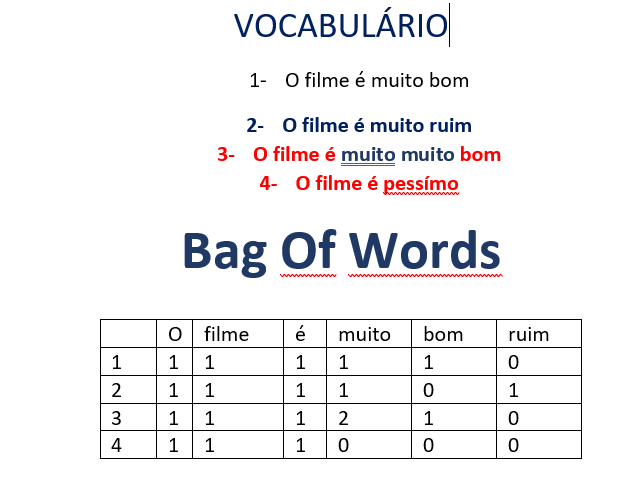

In [30]:
# Codar

# Vetorizar o Corpus em Números

from sklearn.feature_extraction.text import CountVectorizer

# corpus

texto = ["O filme é muito bom", "o filme é muito ruim"]

# vetorização - pegar a frase e criar um vetor

vetorizar = CountVectorizer(lowercase=False)

# aplicar no nosso corpo (corpus)

bag_of_words = vetorizar.fit_transform(texto)

In [31]:
# mostrando bag_of_words
bag_of_words

<2x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [37]:
# e as palavras do vocabulário?
# Transformou para mínusculo?

vetorizar.get_feature_names_out()

array(['bom', 'filme', 'muito', 'ruim'], dtype=object)

In [36]:
# Tabelinha Bag Of Words DataFrame

matriz = pd.DataFrame(bag_of_words.toarray(), columns=vetorizar.get_feature_names_out())

In [38]:
# Matriz Esparsa

matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [39]:
matriz_esparsa

,bom,filme,muito,ruim
0,1,1,1,0
1,0,1,1,1


# Exercício

Aprendemos matriz densa,
1. Bag of Words
2. Matriz Esparsa
3. Matriz Densa
4. Como funciona o treinamento com Bag Of Words

Corpus - "O filme é bom", "o filme é ruim"

Agora faça um Bag of Words- aplicando ao caso real (IMDB-PT-BR) - 50.000 mil

In [43]:
# prompt: Corpus - "O filme é bom", "o filme é ruim"

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Carregue o dataset IMDB-PT-BR
imdb_df = pd.read_csv('datasets/imdb-reviews-pt-br.csv')

# Obtenha apenas a coluna de texto (reviews)
corpus = imdb_df['text_pt'].tolist()

# Vetorize o corpus
vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(corpus)

# Crie um DataFrame com a matriz esparsa
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())

# Exiba a matriz esparsa (opcional)
print(matriz_esparsa)


       00  000  0000000000001  0000001  00001  00015  000DM  000WTF  001  \
0       0    0              0        0      0      0      0       0    0   
1       0    0              0        0      0      0      0       0    0   
2       0    0              0        0      0      0      0       0    0   
3       0    0              0        0      0      0      0       0    0   
4       0    0              0        0      0      0      0       0    0   
...    ..  ...            ...      ...    ...    ...    ...     ...  ...   
49454   0    0              0        0      0      0      0       0    0   
49455   0    0              0        0      0      0      0       0    0   
49456   0    0              0        0      0      0      0       0    0   
49457   0    0              0        0      0      0      0       0    0   
49458   0    0              0        0      0      0      0       0    0   

       003830  ...  útero  útil  über  übermensch  übermenschlich  überwoman  \
0      